# Investigating Fandango Movie Ratings

In october 2015,  a [report](https://fivethirtyeight.com/features/fandango-movies-ratings/) writed by Walt Hickey, analyzed movie ratings data from [fandango.com](https://www.fandango.com/) (an online movie ratings aggregator). He found that Fandango's rating system was biased and  corrupt. Hickey tell that there's significant discrepancy between the number of stars displayed to user and the actual rating, which he was able to find in the HTML of the pages,

for example:
1. the actual movie rating's was always rounded up to the nearest half-star, for instante, movie with 4.1 ratings, rounded up to 4.5.
2. Hickey also found that many of movie ratings rounded up to the whole-star, like 4.5 ratings rounded up to 5 and 4.0 ratings to 5.

   After that report, fandango officials replied that the biases caused by a bug in their system and they promised to fix that propblem,
    
   According to that, this project will discuss about that and try to find and determine whether there has been any change in fandango's rating system after Hickey's report

## understand the data

one of the best way to find whether there has been any change in fandango rating's system after hickey's report is to compare the data from system ratings before and after report. To get that, i will use data from two source,

1. data from Walt Hickey's analysis, which is available on [His Github](https://github.com/fivethirtyeight/data/tree/master/fandango), i will use the data to analyze characteristic fandango's rating system for 'before report' hickey.

2. data from [Dataquest's team member](https://github.com/mircealex/Movie_ratings_2016_17), i will use the data to analyze characteristic fandango's rating system 'after report' hickey.

### read the data

In [1]:
#import pandas
import pandas as pd

In [2]:
#read in the dataset
before_reports = pd.read_csv('fandango_score_comparison.csv')
after_reports = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
# Quick exploration of the data
print(before_reports.shape)
before_reports.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


data from hickey's report have 22 columns and 146 rows, which is one rows represent one films data ratings. This dataset contain detail data about average film rating from many website, such as rottentomatoes and metacritic and fandango itself including number of user who give the film ratings from many website

In [4]:
#explore the after_reports dataset
print(after_reports.shape)
after_reports.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


although have difference format with 'before reports' dataset, 'after reports' dataset have similar value. with 15 columns and 214 rows, dataset contains information abaout film ratings from many website and fandango itself, including number of user who give the ratings.

because my objectivee just compare fandango's befor and after hickey's reports,  will isolate both dataset just to show only information about fandango's ratings

1. For 'before reports' dataset , i will select following columns such as ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', and 'Fandango_Difference'.
2. for the 'after reports' dataset, ['movie', 'year' and 'fandango'] columns will be choosen

In [5]:
#select the data 
fandango_before = before_reports[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = after_reports[['movie', 'year', 'fandango']]

my goal to know whether there has been any changes in fandango rating's system after hickey's report. my population interest for the analysis is all information about film ratings in fandango website.

because the current focus is to know the characteristic fandango rating's system before and after hickey's report, i interested to sampling population become two different period of time - before report and after report-. so we can compare two dataset.

using above explanation, the dataset for analysis was taken from two source, dataset before analysis was from [hickey's repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and data after analysis was from [dataquest team repository](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)

From hickey's dataset, after read read.me from repository, i got many information:
1. the film  was choosen from film with only more than 30 fans
2. film dataset taken at august 2015 and must have ticket on sale at 2015

the sampling was clearly not random, there was many of dataset doesn't have chance to choosen or taken especially from film which have number of fans less than 30 and doesn't have ticket on sale. this situation make dataset not representative for the population we're trying to describe.

from dataquest team dataset, we got:
1. the film was choosen from 214 most popular film in fandango
2. data taken between 2016-2017 or after hickey's report

this second sample not representative for my population interest.

both dataset was taken only to answer their research question, when it is apropriate for their research, the dataset don't seem useful for me.




## Changing the Goal of the Analysis

At this point, we have at least two alternative to solve that situation
1. change the goal of analysis
2. collect new data

Because it kind hard to collect new sample and it's quasi-impossible to collect a new sample previous to hickey's report, i will choose to change goal of analysis

Instead of trying to answer whether there has been any change in fandango's rating system after Hickey's report,  i change the goal of analysis whether there has been any different in fandango's rating for popular film in 2015 and fandango's rating for popular film in 2016.


## Isolating the sample

With the new goal, two new populations has choosen to describe and compare with each other.

1. All fandango's ratings for popular film released in 2015
2. All fandango's ratings for popular film released in 2016

term "popular" is vague and need to define more precise. i will use hickey's benchmark of 30 fans ratings and consider film become "popular" only if it has 30 or higher fans ratings in fandango's website

In [6]:
#check popular film in 'fandango_before' dataset

len(fandango_before[fandango_before['Fandango_votes'] < 30])

0

for 'fandango_after' dataset, i found that dataset doesn't provide information about the number of fan ratings, we can see it below

In [7]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


dataset only contain name film , year and fandango_rating. to solve this issu, i will do this:

first, using simple random sampling, i will sampling 'fandango_after' dataset, take 10 row from dataset.

second, from 10 sample dataset,i will search the movie in fandango website to know number of fan ratings,

tird, after we got the data, we can compare it with sample dataset, if 9/10 or 8/10 data have or more than 30 fan ratings then 'fandongo_after' is eligible for analyst with 'fandango_before' dataset.

In [8]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As february 2020, these are fan ratings i found

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-amwm">Movie</th>
    <th class="tg-amwm">Fan ratings</th>
  </tr>
  <tr>
    <td class="tg-baqh">Mechanic: Resurrection</td>
    <td class="tg-baqh">25593</td>
  </tr>
  <tr>
    <td class="tg-baqh">Warcraft</td>
    <td class="tg-baqh">31489</td>
  </tr>
  <tr>
    <td class="tg-baqh">Max Steel</td>
    <td class="tg-baqh">6819</td>
  </tr>
  <tr>
    <td class="tg-baqh">Me Before You</td>
    <td class="tg-baqh">30572</td>
  </tr>
  <tr>
    <td class="tg-baqh">Fantastic Beasts and Where to Find Them</td>
    <td class="tg-baqh">87686</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Cell</td>
    <td class="tg-yw4l">3793</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Genius</td>
    <td class="tg-yw4l">0</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Sully</td>
    <td class="tg-yw4l">48395</td>
  </tr>
  <tr>
    <td class="tg-yw4l">A Hologram for the King	</td>
    <td class="tg-yw4l">10201</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Captain America: Civil War</td>
    <td class="tg-yw4l">179536</td>
  </tr>
</table>

it clearly that 90 % of the sampel dataset have number fan ratings more than 30 and only 1 movie have zero fan ratings(i found that part of website for showing number fans has disappeared) so 'fandango_after' dataset can be used for analysis


if we see more deeply in 2 dataset, we will se that the data contains film from many years. so, to make dataset more focus only year 2015 and 2016, we should separated both dataset depends on the year

'fandango_before' dataset doesn't have years columns, we can see in the data below

In [9]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


suprisingly, column film have year in the end of name's film.so, i can extract the year from film's columns make make new columns from that.

In [10]:
#extract the year and make new columns from that
fandango_before['year'] = fandango_before['FILM'].str.extract(r'\((.*?)\)').astype('int')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
#copy the data just contain year 2015 and year 2016
fandango_2015 = fandango_before[fandango_before['year'] == 2015]
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

In [12]:
#copy other year for future analysis
fandango_2017 = fandango_after[fandango_after['year'] == 2017]
fandango_2014 = fandango_before[fandango_before['year'] == 2014]

## Comparing Distribution Shapes for 2015 and 2016

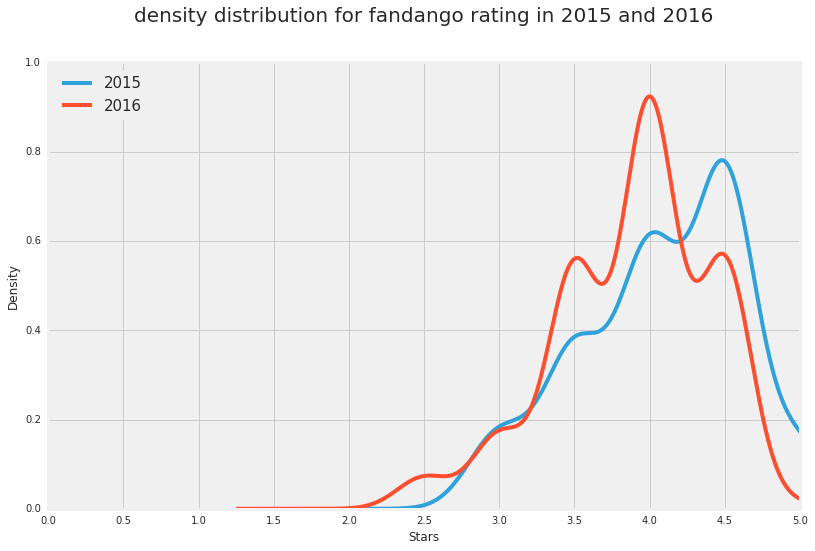

In [13]:
#import library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#style for visualizaton
plt.style.use('fivethirtyeight')

%matplotlib inline

#plot the data
fandango_2015['Fandango_Stars'].plot.kde(label='2015',legend=True, figsize=(12,8))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title('density distribution for fandango rating in 2015 and 2016', size=20, y=1.08)

plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.legend(framealpha=1, frameon=True, loc=2, prop={'size': 15})


plt.show()


there are two kind explanation from the KDE above:
1. both of data are completely left skewed
2. slightly difference appear from both KDE, where KDE data from 2016 is more left than 2015's data

left skewed causing by sample data from fandango website itself, where most of data have rating more than 2.5  and both data have average rating's 4.0 for every film in the dataset.

a leftward shift that occur in the 2015's KDE show that there are indeed different between popular movie ratings in 2016 and 2015 data, where 2016's KDE become slightly lower compare to 2015's KDE 



## Comparing Relative Frequencies

comparing the distribution with the help of KDE plots was a right choice for ratio data type such as film rating's. But, if we see more deply, we will know that both of data have many different information. so analyze more granular information such as frequency distibution is needed.

The samples have different number of film, it is make non sense if we use absolute frequencies. instead using absolute frequency, i will use relative frequencies and create percentages of frequency to make table become more readability.

In [14]:
#fandango_2015

print('2015 fandango')
print('-'*15)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015 fandango
---------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
#fandango_2016

print('2016 fandango')
print('-'*15)
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016 fandango
---------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [16]:
f_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100
f_2016 = fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

n_data = pd.DataFrame(f_2015, f_2016)

in 2016, fandango have higher percentage of frequency in 3.5 and 4.0 ratings rather than 2015 data, but apart from that, we can tell that 2016 data have lower value than 2015. the reason is

1. in the very high rating (5.0 and 4.5) 2016 data have lower percentage than 2015 data, with only less one percent have perfect(5.0) ratings in 2016 than 2015 with at least 7 %. ratings 4.5 also become unpopular in 2016, with at least 13 % decrease in the 2016.
2. there was a decrease in 3.0 ratings in 2016 data (10 % difference with 2015 data)
3. i also found that 2016 data have 2.5 ratings, which is not found in the 2015 data




## Determining the Direction of the Change

to get more precise picture about difference between 2015 and 2016, i will compute and plot median, mean and mode from both data

In [25]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


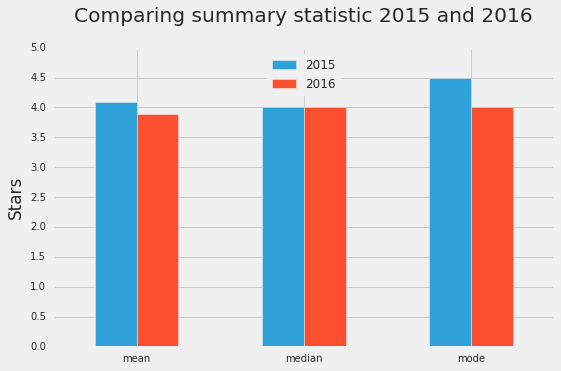

In [42]:
plt.style.use('fivethirtyeight')
summary.plot.bar(figsize=(8,5), rot=.45)

plt.ylim(0,5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha=1,frameon=True, loc='upper center', prop={'size':12})
plt.title('Comparing summary statistic 2015 and 2016', y=1.07)

plt.show()

in the picture above, it is clear that mean and mode have different value in both data, while median have same value.
mean and mode in 2016 data are little lower than 2015 data. On average, we can say that ratings for popular film in 2016 fandango is lower than ratings for popular films in 2015.

## Conclusion

In this project,  i try to anlyze and investigate  whether there has been any change in fandango's rating system after Hickey's report. I use data from year 2015 (data from hickey's repository) and data from 2016. 

generally, there was slightly different between 2015 data and 2016 data, where 2016 data have lower value than 2015 data.

